In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv("logisti multiple variable.csv")

In [5]:
df

,dates,sale,profit,sensex,binary
0,2018,34000,25000,34000,1
1,2019,45000,20000,68000,2
2,2020,89000,90000,78000,3
3,2021,100000,800000,88000,1
4,2022,300000,250000,98000,2
5,2023,230000,100000,100000,3
6,2024,450000,200000,150000,1
7,2025,650000,300000,178000,2


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['sale','profit','sensex']],df[['binary']],test_size=0.4)

In [43]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4, 3), (4, 1), (4, 3), (4, 1))

In [44]:
y_train

,binary
2,3
5,3
7,2
0,1


In [45]:
x_test

,sale,profit,sensex
1,45000,20000,68000
4,300000,250000,98000
6,450000,200000,150000
3,100000,800000,88000


In [46]:
y_test

,binary
1,2
4,2
6,1
3,1


In [47]:
from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()

In [49]:
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
lr.scores=(x_test,y_test)

In [53]:
lr.predict([[100000,800000,88000]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print ('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [32]:
import seaborn as sns 

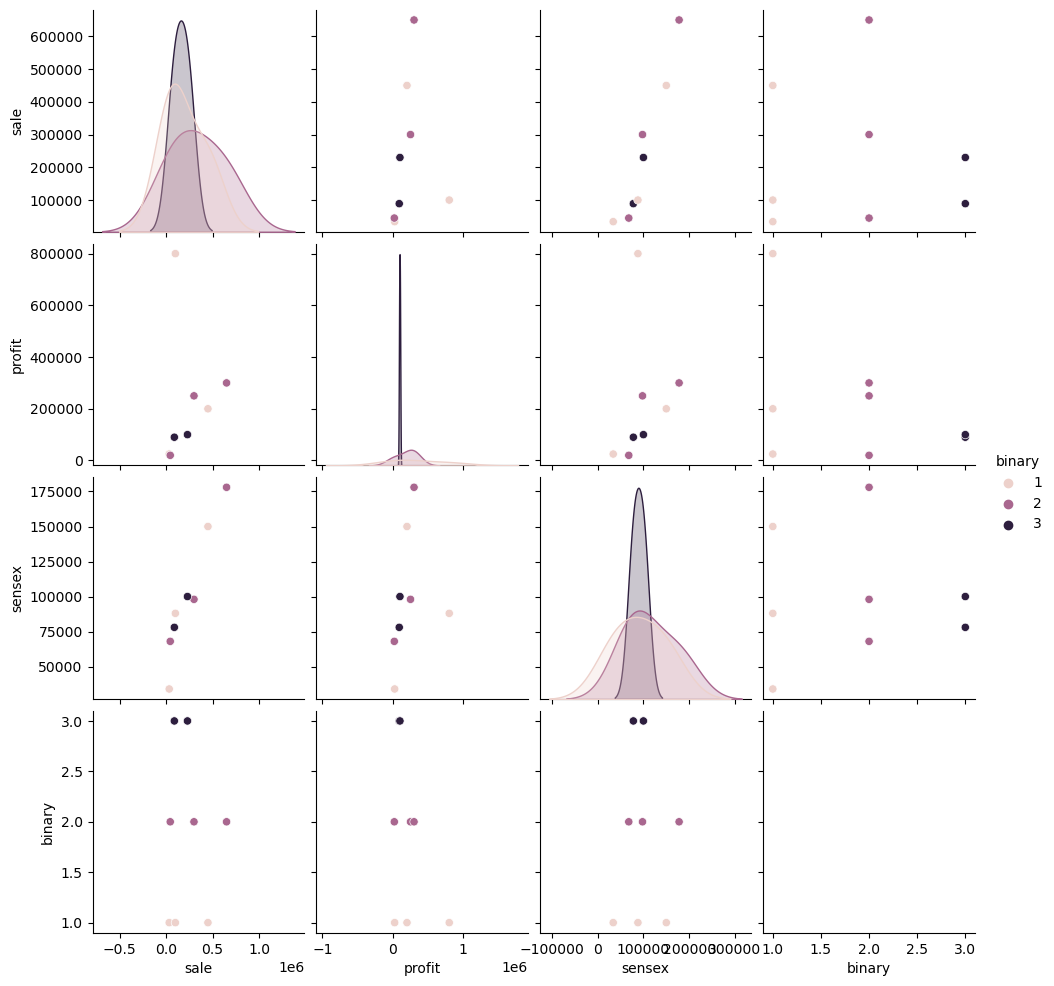

In [19]:
sns.pairplot(df,vars=('sale','profit','sensex','binary'),hue='binary')
plt.show()

In [20]:
import joblib

In [21]:
joblib.dump(lr,"lr_joblib")

['lr_joblib']

In [22]:
lr = joblib.load('lr_joblib')

In [51]:
lr.coef_

array([[ 1.11288444e-05,  5.54898839e-06, -3.80138192e-05],
       [-4.04348539e-06, -9.22386477e-07,  1.28709600e-05],
       [-7.08535903e-06, -4.62660192e-06,  2.51428591e-05]])

In [52]:
lr.intercept_

array([-1.56875173e-09,  1.10225238e-09,  4.66499348e-10])

In [54]:
lr.predict([[20000,35000,30000]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3], dtype=int64)